# Applying Linear Regression

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib as mpl

In [31]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

def linear_regression(particle_data, features, targets):
    '''Function to apply linear regression to test between run_times as features and other characteristics as targets'''

    result_list = []
    X = particle_data[features]

    # Loop through each characteristic feature (dependent variables)
    for target in targets:
        # Check if the column is entirely NaN and skip if true
        if particle_data[target].isna().all():
            continue

        #target_mean = particle_data[target].mean()
        #y = abs(particle_data[target] - target_mean) 

        y = particle_data[[target]]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
        
        # Linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Calculate R² score
        r2 = r2_score(y_test, y_pred)

        # Compute the average of the characteristic
        avg_value = particle_data[target].mean()
        std_value = particle_data[target].std()

        intercept = model.intercept_[0] 
        slope = model.coef_.flatten().tolist() if len(features) > 1 else model.coef_[0]

        # Append the result to the result list
        result_list.append({
            'target': target,
            'Average': avg_value,
            'Standard Deviation': std_value,
            'R2': r2,
            'Intercept': intercept,
            'Slope': slope[0]
        })

    # Convert the result list into a DataFrame
    result_table = pd.DataFrame(result_list)

    return result_table

In [33]:
# import data
particle_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/Ti64_Composition_Tools/Ti_Powder_All_Lots/Powder Results Summary/Merged_Element_Composition_Tables.csv')

In [34]:
#particle_data = particle_data.drop(particle_data.columns[0], axis=1)
particle_data.columns

Index(['Lot', 'GroupID', 'Rev', 'Aluminum (wt%)', 'Carbon (wt%)',
       'Chromium (wt%)', 'Hydrogen (wt%)', 'Iron (wt%)', 'Nickel (wt%)',
       'Nitrogen (wt%)', 'Oxygen (wt%)', 'Silicon (wt%)', 'Titanium (wt%)',
       'Vanadium (wt%)', 'Yttrium (wt%)'],
      dtype='object')

In [35]:
particle_data['Lot'].unique()

array(['P1442', 'P1444', 'P222', 'P2002', 'P1440', 'P2328', 'P0525'],
      dtype=object)

In [36]:
#particle_data = particle_data.loc[(particle_data['Diameter (ABD) (µm)'] >= 40) & (particle_data['Diameter (ABD) (µm)'] <= 110)]
particle_data = particle_data.loc[(particle_data['Rev'] >= 3)]
particle_data = particle_data.dropna()
#particle_data = particle_data[['Lot', 'GroupID', 'Rev', 'Aluminum (wt%)', 'Carbon (wt%)','Chromium (wt%)', 'Hydrogen (wt%)', 'Iron (wt%)', 'Nickel (wt%)','Nitrogen (wt%)', 'Oxygen (wt%)', 'Silicon (wt%)', 'Titanium (wt%)','Vanadium (wt%)', 'Yttrium (wt%)']]

In [37]:
particle_data = particle_data.loc[(particle_data)['Lot']=='P1444']
particle_data

,Lot,GroupID,Rev,Aluminum (wt%),Carbon (wt%),Chromium (wt%),Hydrogen (wt%),Iron (wt%),Nickel (wt%),Nitrogen (wt%),Oxygen (wt%),Silicon (wt%),Titanium (wt%),Vanadium (wt%),Yttrium (wt%)
23,P1444,1,7,6.360,0.0100,0.0150,0.00380,0.200,0.0100,0.01300,0.155000,0.0160,89.222700,4.020,0.0005
25,P1444,1,5,6.370,0.0070,0.0130,0.00170,0.180,0.0100,0.01300,0.145000,0.0110,89.339800,3.930,0.0005
29,P1444,2,6,6.420,0.0170,0.0150,0.00150,0.200,0.0100,0.01400,0.154000,0.0130,89.188000,3.990,0.0005
30,P1444,3,8,6.330,0.0110,0.0150,0.00150,0.180,0.0110,0.01400,0.167000,0.0140,89.221000,4.060,0.0005
31,P1444,4,4,6.440,0.0070,0.0000,0.00120,0.190,0.0000,0.01400,0.128000,0.0130,89.259800,3.960,0.0005
32,P1444,1,9,6.400,0.0220,0.0150,0.00120,0.200,0.0110,0.00500,0.176000,0.0120,89.110300,4.070,0.0005
33,P1444,3,9,6.390,0.0100,0.0150,0.00160,0.190,0.0110,0.01500,0.177000,0.0100,89.230900,3.970,0.0005
34,P1444,4,5,6.360,0.0190,0.0140,0.00120,0.190,0.0100,0.00600,0.144000,0.0100,89.175300,4.090,0.0005
35,P1444,2,9,6.470,0.0170,0.0170,0.00150,0.200,0.0110,0.00600,0.156000,0.0140,89.132000,4.000,0.0005
37,P1444,3,5,6.370,0.0160,0.0160,0.00210,0.190,0.0110,0.01300,0.147000,0.0150,89.215400,4.030,0.0005


In [38]:
# Define run times as features (independent variables)
features = ['Rev']

# Define target features (dependent variables)
#target = ['Aspect Ratio','Circularity','Diameter (ABD) (µm)', 'Elongation', 'Roughness']

target = ['Oxygen (wt%)', 'Vanadium (wt%)',  'Iron (wt%)', 'Aluminum (wt%)']

# Call the function and pass the dataset
r2_table = linear_regression(particle_data, features=features, targets=target)

# Print the resulting table with average values and R² scores
r2_table = r2_table.round(3)
r2_table

,target,Average,Standard Deviation,R2,Intercept,Slope
0,Oxygen (wt%),0.142,0.025,0.748,0.089,0.009
1,Vanadium (wt%),4.013,0.061,0.224,3.954,0.010
2,Iron (wt%),0.191,0.009,0.204,0.177,0.002
3,Aluminum (wt%),6.404,0.047,-0.099,6.430,-0.004


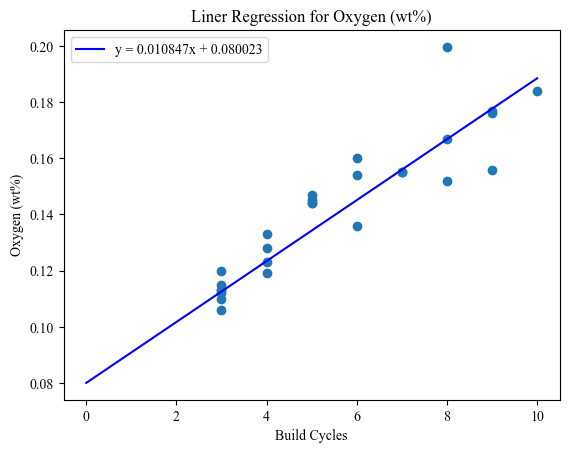

In [39]:
# plot oxygen 
import numpy as np 

def plot_line(slope, intercept, x_range):
    '''Function to plot a line given the slope, intercept, and x_range'''
    
    # Generate y values using the equation of the line
    y_values = slope * x_range + intercept

    # Plot the line
    plt.plot(x_range, y_values, label=f"y = {slope}x + {intercept}", color="blue")
    plt.xlabel('Build Cycles')
    plt.ylabel('Oxygen (wt%)')
    plt.title('Liner Regression for Oxygen (wt%)')
    plt.legend()
    plt.show()

# Example usage
slope = 0.010847 
intercept = 0.080023	 
x_range = np.linspace(0, 10, 100)  

# Plot the line
plt.scatter(particle_data['Rev'], particle_data['Oxygen (wt%)'])
plot_line(slope, intercept, x_range)
